In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
class MyLinearRegression():
	def __init__(self, thetas, alpha=0.001, max_iter=10000):
		if  not isinstance(thetas, np.ndarray) or not isinstance(alpha, float) or not isinstance(max_iter, int):
			return
		elif thetas.size <= 0 or alpha <= 0 or max_iter <= 0:
			return
		elif thetas.ndim != 2 or thetas.shape[1] != 1:
			return
		self.thetas = thetas
		self.alpha = alpha
		self.max_iter = max_iter
	
	def zscore(self, x):
		if not isinstance(x, np.ndarray):
			return
		elif x.size <= 0 or x.ndim != 2:
			return
		return (x - x.mean()) / x.std()

	def minmax(self, x):
		if not isinstance(x, np.ndarray):
			return
		elif x.size <= 0 or x.ndim != 2:
			return
		x_diff = x.max() - x.min()
		return (x - x.min()) / x_diff

	def predict_(self, x):
		if not isinstance(x, np.ndarray) or not isinstance(self.thetas, np.ndarray):
			return
		elif x.size <= 0 or self.thetas.size <= 0:
			return
		elif x.ndim != 2 or self.thetas.ndim != 2:
			return

		m, n = x.shape

		X_Prime = np.hstack((np.ones((m, 1)), x))

		if self.thetas.shape != (n + 1, 1):
			return

		return X_Prime @ self.thetas
	
	def loss_(self, y, y_hat):
		m = y.shape[0]

		error = y_hat - y

		return 1 / m * error.T @ error

	def fit_(self, x, y):
		if not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray) or not isinstance(self.thetas, np.ndarray):
			print("Error: Fit 1")
			return
		elif x.size <= 0 or y.size <= 0 or self.thetas.size <= 0:
			print("Error: Fit 2")
			return
		elif x.ndim != 2 or y.ndim != 2 or self.thetas.ndim != 2:
			print("Error: Fit 3")
			return
		m, n = x.shape
		if y.shape != (m, 1) or self.thetas.shape != (n + 1, 1):
			print("Error: Fit 4")
			return

		self.thetas = self.thetas.astype(np.float64)
		
		for _ in range(self.max_iter):
			y_hat = self.predict_(x)

			error = y_hat - y

			X_Prime = np.hstack((np.ones((m, 1)), x))

			gradient = (1 / m) * (X_Prime.T @ error)

			self.thetas -= self.alpha * gradient


In [4]:
def add_polynomial_features(x, power):
	if not isinstance(x, np.ndarray) or not isinstance(power, int):
		return
	if x.size <= 0 or x.ndim != 2 or x.shape[1] != 1:
		return

	X_Pow = x.copy()

	for i in range(power):
		if (i > 0):
			X_Pow = np.hstack((X_Pow, pow(x, i + 1)))
	
	return X_Pow


In [5]:
print("Test Polynomial Creation")
x = np.arange(1,6).reshape(-1, 1)
# Example 0:
print(repr(add_polynomial_features(x, 3)))
# Output:
#array([[ 1, 1, 1], [ 2, 4, 8], [ 3, 9, 27], [ 4, 16, 64], [ 5, 25, 125]])

# Example 1:
print(repr(add_polynomial_features(x, 6)))
# Output:
#array([[ 1, 1, 1, [ 2, 4, 8, [ 3, 9, 27, [ 4, 16, 64, [ 5, 25, 125, 1, 16, 81, 256, 625, 1, 1], 32, 64], 243, 729], 1024, 4096], 3125, 15625]])

Test Polynomial Creation
array([[  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125]])
array([[    1,     1,     1,     1,     1,     1],
       [    2,     4,     8,    16,    32,    64],
       [    3,     9,    27,    81,   243,   729],
       [    4,    16,    64,   256,  1024,  4096],
       [    5,    25,   125,   625,  3125, 15625]])


In [6]:
data = pd.read_csv("are_blue_pills_magics.csv")

model = MyLinearRegression(np.array([[1.0]]))

X = np.array(data["Micrograms"]).reshape(-1, 1)
print(X.shape)

Y = np.array(data["Score"]).reshape(-1, 1)
print(Y.shape)

#Create 6 artificial polynomial dataset
X_1 = X
#print(repr(X_1))
X_2 = add_polynomial_features(X, 2)
#print(repr(X_2))
X_3 = model.minmax(add_polynomial_features(X, 3))
#print(repr(X_3))
X_4 = add_polynomial_features(X, 4)
#X_4 = model.minmax(add_polynomial_features(X, 4))
#print(repr(X_4))
X_5 = add_polynomial_features(X, 5)
#X_5 = model.minmax(add_polynomial_features(X, 5))
#print(repr(X_5))
X_6 = add_polynomial_features(X, 6)
#X_6 = model.minmax(add_polynomial_features(X, 6))
#print(repr(X_6))

(7, 1)
(7, 1)


In [7]:
theta1 = np.array([[1], [1]]).reshape(-1,1)
Pm1 = MyLinearRegression(theta1, alpha=0.001, max_iter=1000000)
Pm1.fit_(X_1, Y)

In [24]:

theta2 = np.array([[1.0], [1.0], [1.0]]).reshape(-1,1)
Pm2 = MyLinearRegression(theta2, alpha=1e-4, max_iter=1000000)
Pm2.fit_(X_2, Y)

In [36]:

theta3 = np.array([[1.0], [1.0], [1.0], [1.0]]).reshape(-1,1)
Pm3 = MyLinearRegression(theta3, alpha=0.01, max_iter=1000000)
Pm3.fit_(X_3, Y)

In [10]:

theta4 = np.array([[-20],[ 160],[ -80],[ 10],[ -1]]).reshape(-1,1)
Pm4 = MyLinearRegression(theta4, alpha=1e-6, max_iter=1000000)
Pm4.fit_(X_4, Y)

In [11]:
theta5 = np.array([[1140],[ -1850],[ 1110],[ -305],[ 40],[ -2]]).reshape(-1,1)
Pm5 = MyLinearRegression(theta5, alpha=1e-8, max_iter=1000000)
Pm5.fit_(X_5, Y)

In [12]:
theta6 = np.array([[9110],[ -18015],[ 13400],[ -4935],[ 966],[ -96.4],[ 3.86]]).reshape(-1,1)
Pm6 = MyLinearRegression(theta6, alpha=1e-9, max_iter=1000000)
Pm6.fit_(X_6, Y)

[36.268761258524435, 48.49326829231852, 46.818333688879044, 29.543308651145303, 25.674921082009906, 3.1370180165104498]


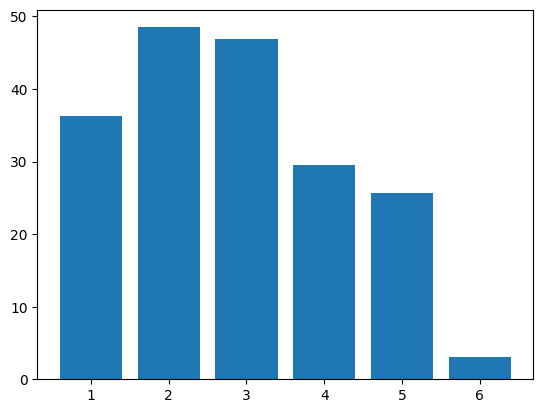

In [40]:
#Predict
Y_HAT_1 = Pm1.predict_(X_1)
#print(repr(Y_HAT_1))
Y_HAT_2 = Pm2.predict_(X_2)
#print(repr(Y_HAT_2))
Y_HAT_3 = Pm3.predict_(X_3)
#print(repr(Y_HAT_3))
Y_HAT_4 = Pm4.predict_(X_4)
#print(repr(Y_HAT_4))
Y_HAT_5 = Pm5.predict_(X_5)
#print(repr(Y_HAT_5))
Y_HAT_6 = Pm6.predict_(X_6)
#print(repr(Y_HAT_6))

#Calculate Loss
LOSS_1 = Pm1.loss_(Y, Y_HAT_1).flatten()
LOSS_2 = Pm2.loss_(Y, Y_HAT_2).flatten()
LOSS_3 = Pm3.loss_(Y, Y_HAT_3).flatten()
LOSS_4 = Pm4.loss_(Y, Y_HAT_4).flatten()
LOSS_5 = Pm5.loss_(Y, Y_HAT_5).flatten()
LOSS_6 = Pm6.loss_(Y, Y_HAT_6).flatten()

mse = [float(LOSS_1[0]), float(LOSS_2[0]), float(LOSS_3[0]), float(LOSS_4[0]), float(LOSS_5[0]), float(LOSS_6[0])]
print(mse)
degree = [1, 2, 3, 4, 5, 6]

plt.Figure(figsize=(10, 6))
plt.bar(degree, mse)
plt.show()




(200, 1)
[[  -434.94457079]
 [  -455.48287782]
 [  -476.41468497]
 [  -497.73951208]
 [  -519.45687903]
 [  -541.56630567]
 [  -564.06731187]
 [  -586.95941749]
 [  -610.2421424 ]
 [  -633.91500645]
 [  -657.97752951]
 [  -682.42923143]
 [  -707.2696321 ]
 [  -732.49825136]
 [  -758.11460907]
 [  -784.11822511]
 [  -810.50861933]
 [  -837.2853116 ]
 [  -864.44782177]
 [  -891.99566972]
 [  -919.9283753 ]
 [  -948.24545838]
 [  -976.94643881]
 [ -1006.03083647]
 [ -1035.49817121]
 [ -1065.34796289]
 [ -1095.57973139]
 [ -1126.19299655]
 [ -1157.18727825]
 [ -1188.56209635]
 [ -1220.3169707 ]
 [ -1252.45142118]
 [ -1284.96496764]
 [ -1317.85712995]
 [ -1351.12742796]
 [ -1384.77538155]
 [ -1418.80051057]
 [ -1453.20233489]
 [ -1487.98037437]
 [ -1523.13414887]
 [ -1558.66317825]
 [ -1594.56698238]
 [ -1630.84508112]
 [ -1667.49699433]
 [ -1704.52224188]
 [ -1741.92034362]
 [ -1779.69081942]
 [ -1817.83318915]
 [ -1856.34697266]
 [ -1895.23168981]
 [ -1934.48686048]
 [ -1974.11200451]
 [ 

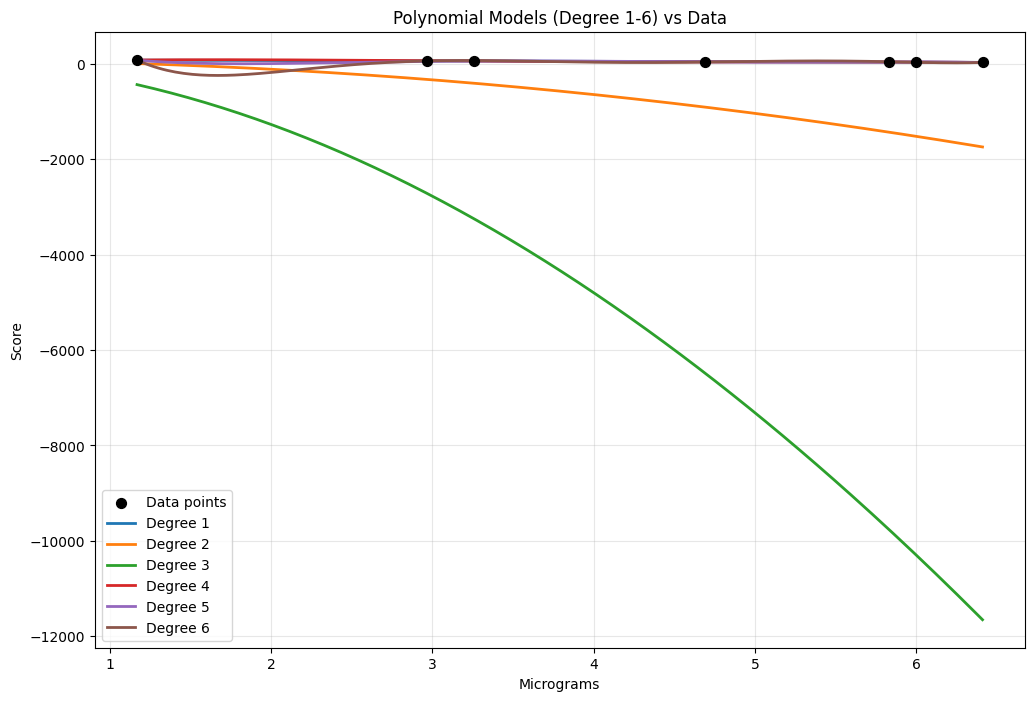

In [38]:
X_Continue = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
print(X_Continue.shape)

X_Continue_1 = add_polynomial_features(X_Continue, 1)
X_Continue_2 = add_polynomial_features(X_Continue, 2)
X_Continue_3 = add_polynomial_features(X_Continue, 3)
X_Continue_4 = add_polynomial_features(X_Continue, 4)
X_Continue_5 = add_polynomial_features(X_Continue, 5)
X_Continue_6 = add_polynomial_features(X_Continue, 6)

Y_HAT_Continue_1 = Pm1.predict_(X_Continue_1)
Y_HAT_Continue_2 = Pm2.predict_(X_Continue_2)
Y_HAT_Continue_3 = Pm3.predict_(X_Continue_3)
print(Y_HAT_Continue_3)
Y_HAT_Continue_4 = Pm4.predict_(X_Continue_4)
Y_HAT_Continue_5 = Pm5.predict_(X_Continue_5)
Y_HAT_Continue_6 = Pm6.predict_(X_Continue_6)

# Plot all models and data points
plt.figure(figsize=(12, 8))
plt.scatter(X, Y, color='black', s=50, label='Data points', zorder=5)
plt.plot(X_Continue, Y_HAT_Continue_1, label='Degree 1', linewidth=2)
plt.plot(X_Continue, Y_HAT_Continue_2, label='Degree 2', linewidth=2)
plt.plot(X_Continue, Y_HAT_Continue_3, label='Degree 3', linewidth=2)
plt.plot(X_Continue, Y_HAT_Continue_4, label='Degree 4', linewidth=2)
plt.plot(X_Continue, Y_HAT_Continue_5, label='Degree 5', linewidth=2)
plt.plot(X_Continue, Y_HAT_Continue_6, label='Degree 6', linewidth=2)
plt.xlabel('Micrograms')
plt.ylabel('Score')
plt.title('Polynomial Models (Degree 1-6) vs Data')
plt.legend()
plt.grid(alpha=0.3)
plt.show()